In [ ]:
from dataset import Corpus

data_dir = "/Users/jerryzhou/Downloads/TuringBench/AA"

In [21]:
import pandas as pd

df = pd.read_csv('~/Downloads/TuringBench/AA/train.csv')

In [22]:
label_counts = df['label'].value_counts()
label_counts

label
gpt2_pytorch    5964
pplm_gpt2       5964
xlnet_base      5964
xlm             5964
grover_base     5964
human           5964
pplm_distil     5964
gpt2_small      5507
fair_wmt19      5507
grover_large    5507
gpt3            5507
gpt2_large      5507
grover_mega     5507
gpt2_medium     5507
gpt2_xl         5402
gpt1            5402
fair_wmt20      5402
transfo_xl      5401
xlnet_large     5152
ctrl            5148
Name: count, dtype: int64

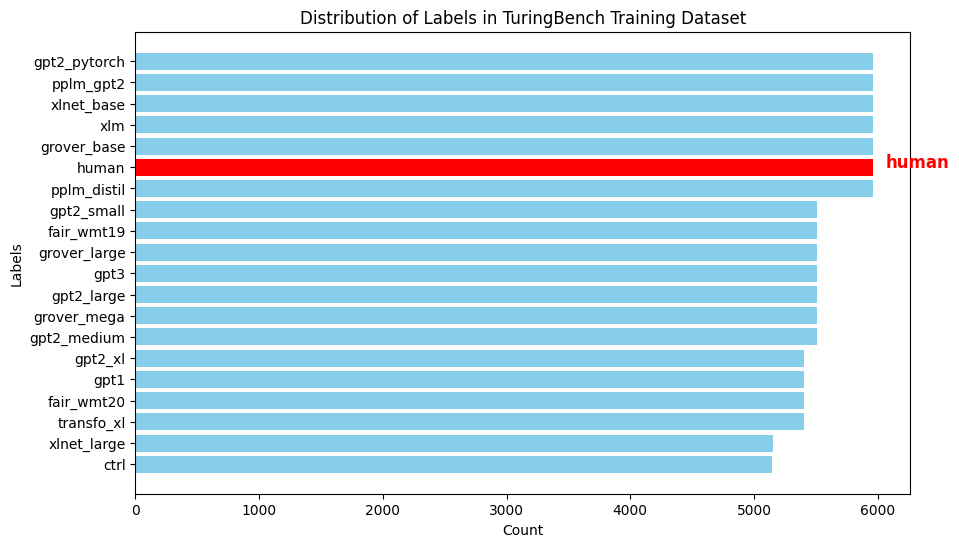

In [25]:
import matplotlib.pyplot as plt

label_data = {
    'label': list(label_counts.keys()),
    'count': label_counts.values
}

df_label = pd.DataFrame(label_data)

# Sorting by count for better visualization
df_label = df_label.sort_values(by="count", ascending=False)
# Plot distribution
plt.figure(figsize=(10, 6))
colors = ['red' if label == 'human' else 'skyblue' for label in df_label['label']]

plt.barh(df_label['label'], df_label['count'], color=colors)
plt.xlabel("Count")
plt.ylabel("Labels")
plt.title("Distribution of Labels in TuringBench Training Dataset")
plt.gca().invert_yaxis()  # Invert to have highest count on top

# Annotating the 'human' label with text
human_idx = df_label[df_label['label'] == 'human'].index[0]
plt.text(df_label.loc[human_idx, 'count'] + 100, human_idx, 'human', color='red', fontsize=12, fontweight='bold')

plt.show()